### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### dash_price

#### 1. Read the Data

In [31]:
# Read bitconnect_price file
df = pd.read_csv('../data/raw/dash_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,316.88,333.83,286.53,327.23,"53,928,800","2,388,710,000"
1,2017-09-04,356.94,357.21,301.84,316.13,"44,170,200","2,689,920,000"
2,2017-09-03,354.63,373.08,338.23,356.39,"34,945,200","2,670,270,000"
3,2017-09-02,393.53,395.92,329.27,350.17,"54,813,400","2,962,400,000"
4,2017-09-01,377.92,393.35,376.34,393.35,"55,440,700","2,844,110,000"


In [32]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [33]:
df.count()

Date          1300
Open          1300
High          1300
Low           1300
Close         1300
Volume        1300
Market Cap    1300
dtype: int64

as we can see we have in this file 7 columns and each column has 1300 cell

In [34]:
df.describe()

,Open,High,Low,Close
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,25.991675,27.493179,24.832110,26.235612
std,58.357573,61.685784,55.730453,58.913160
min,0.213899,0.354461,0.213899,0.314865
25%,2.550000,2.717500,2.440000,2.557500
50%,4.605000,5.095000,4.250000,4.605000
75%,11.092500,11.542500,10.542500,11.102500
max,400.420000,409.770000,376.340000,399.850000


In [35]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
Date          1300 non-null datetime64[ns]
Open          1300 non-null float64
High          1300 non-null float64
Low           1300 non-null float64
Close         1300 non-null float64
Volume        1300 non-null object
Market Cap    1300 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 71.2+ KB


In [36]:
#check if the dataset is duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1295    False
1296    False
1297    False
1298    False
1299    False
Length: 1300, dtype: bool

In [37]:
# check and print the number of empty cells (missing data) in each coulmn 
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

as we can see the data frame has 7 columns. each column has 229 cell, and there is no missing data, 
* Volume and Market cap data type are object, it should be number. 

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, so we have to convert all strings into numbers and 
     

In [38]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [39]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(convert_to_number)

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03,1.300000e+03
mean,25.991675,27.493179,24.832110,26.235612,6.241615e+06,1.860709e+08
std,58.357573,61.685784,55.730453,58.913160,1.833914e+07,4.366053e+08
min,0.213899,0.354461,0.213899,0.314865,9.604000e+03,7.025370e+05
25%,2.550000,2.717500,2.440000,2.557500,7.173700e+04,1.409845e+07
50%,4.605000,5.095000,4.250000,4.605000,2.424410e+05,2.574805e+07
75%,11.092500,11.542500,10.542500,11.102500,1.140588e+06,7.024395e+07
max,400.420000,409.770000,376.340000,399.850000,2.674150e+08,3.009530e+09


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
Date          1300 non-null datetime64[ns]
Open          1300 non-null float64
High          1300 non-null float64
Low           1300 non-null float64
Close         1300 non-null float64
Volume        1300 non-null int64
Market Cap    1300 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 71.2 KB


In [41]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.997043,0.998472,0.996400,0.803064,0.999860
High,0.997043,1.000000,0.996960,0.998859,0.838689,0.996853
Low,0.998472,0.996960,1.000000,0.998049,0.804534,0.998395
Close,0.996400,0.998859,0.998049,1.000000,0.829834,0.996279
Volume,0.803064,0.838689,0.804534,0.829834,1.000000,0.801209
Market Cap,0.999860,0.996853,0.998395,0.996279,0.801209,1.000000


as we can see, the "Market Cap and many other variables are almost the same, so let's plot data between Market Cap and other variable, then see the relation between the data


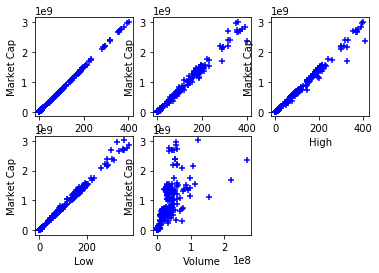

In [42]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

as we can see the Market Cap and (Open, Close and High) have almost a linear relationship

In [43]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [44]:
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Model Score
model.score(Open, Market_Cap)

0.9997207585541508

#### 4. Data Visualization

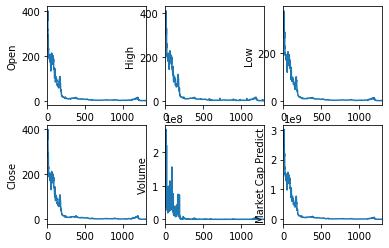

In [48]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df['Market Cap'].plot()